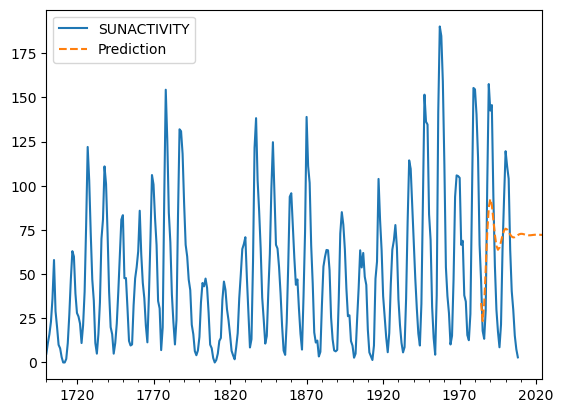

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import warnings

# Suppress specific warnings if desired
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found")

# Load the sunspot dataset
df = sm.datasets.sunspots.load_pandas().data

# Set the index to datetime index
df.index = pd.date_range(start='1700', periods=len(df), freq='A')

# Remove the 'YEAR' column
del df["YEAR"]

# Fit an ARIMA model (ARMA is deprecated)
model = sm.tsa.ARIMA(df, order=(2, 1, 1)).fit()

# Get the current year
year_today = datetime.date.today().year

# Generate predictions from 1984 to the current year
prediction = model.predict(start='1984', end=str(year_today), dynamic=True)

# Plot the original data and the predictions
df.plot(label='Original Data')
prediction.plot(style='--', label='Prediction')
plt.legend()
plt.show()



In [5]:
import numpy as np
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts
import sys

def calc_adf(x, y):
    result = stat.OLS(x, y).fit()
    return ts.adfuller(result.resid)

def main(data_path):
    # Parameters
    N = 501
    t = np.linspace(-2 * np.pi, 2 * np.pi, N)
    
    # Generate data
    sine = np.sin(np.sin(t))
    noise = np.random.normal(0, .01, N)
    cosine = 100 * np.cos(t) + 10
    
    print("Self ADF:", calc_adf(sine, sine))
    print("ADF sine with noise:", calc_adf(sine, sine + noise))
    print("ADF sine vs cosine with noise:", calc_adf(sine, cosine + noise))
    
    # Load data from files
    try:
        gold = np.loadtxt(f'{data_path}/BBK01_WT5511.csv', delimiter=',', usecols=(1,), unpack=True, skiprows=1)
        sp500 = np.loadtxt(f'{data_path}/INDEX_GSPC.csv', delimiter=',', usecols=(6,), unpack=True, skiprows=1)
    except Exception as e:
        print(f"Error loading files: {e}")
        return
    
    # Align data
    sp500 = sp500[-len(gold):]
    gold = gold[::-1]
    sp500 = sp500[::-1]
    
    print("Gold v S & P 500:", calc_adf(gold, sp500))

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python adf_analysis.py <data_directory>")
    else:
        main(sys.argv[1])


Self ADF: (0.03137054452167667, 0.9610507864958918, 1, 499, {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}, -35316.12867374558)
ADF sine with noise: (-10.657182502089631, 4.502861668785593e-19, 6, 494, {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}, -3060.45197240758)
ADF sine vs cosine with noise: (-9.229373371689805, 1.6946291426160983e-15, 18, 482, {'1%': -3.4439899743408136, '5%': -2.8675550551408353, '10%': -2.569973792117904}, -17313.441467694494)
Error loading files: -f/BBK01_WT5511.csv not found.


In [9]:
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(0)
years = np.arange(1700, 1700 + 300)
data = 10 * np.sin(2 * np.pi * years / 100) + np.random.normal(0, 2, size=len(years))

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Value': data
})

# Save to CSV
df.to_csv('data.csv', index=False)
print('data.csv generated successfully.')


data.csv generated successfully.


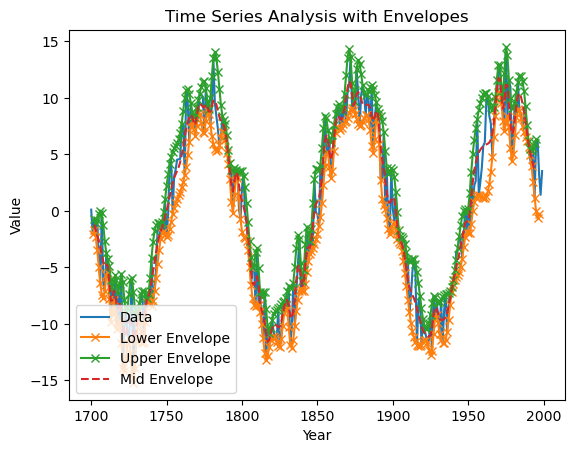

In [15]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate

def main(filename):
    # Load data from the specified CSV file
    data = np.loadtxt(filename, delimiter=',', usecols=(1,), unpack=True, skiprows=1)
    # Reverse the order of the data
    data = data[::-1]

    # Find relative minima and maxima
    mins = signal.argrelmin(data)[0]
    maxs = signal.argrelmax(data)[0]

    # Combine minima and maxima indices
    extrema = np.concatenate((mins, maxs))

    # Define the range of years
    year_range = np.arange(1700, 1700 + len(data))

    # Interpolation for minima
    spl_min = interpolate.interp1d(mins, data[mins], kind='cubic')
    min_rng = np.arange(mins.min(), mins.max())
    l_env = spl_min(min_rng)

    # Interpolation for maxima
    spl_max = interpolate.interp1d(maxs, data[maxs], kind='cubic')
    max_rng = np.arange(maxs.min(), maxs.max())
    u_env = spl_max(max_rng)

    # Define the inclusive range for mid envelope
    inclusive_rng = np.arange(max(min_rng[0], max_rng[0]), min(min_rng[-1], max_rng[-1]))
    mid = (spl_max(inclusive_rng) + spl_min(inclusive_rng)) / 2

    # Plotting the data and envelopes
    plt.plot(year_range, data, label='Data')
    plt.plot(1700 + min_rng, l_env, '-x', label='Lower Envelope')
    plt.plot(1700 + max_rng, u_env, '-x', label='Upper Envelope')
    plt.plot(1700 + inclusive_rng, mid, '--', label='Mid Envelope')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Time Series Analysis with Envelopes')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python envelope_analysis.py <csv_file>")
    else:
        main('data.csv')


In [17]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(0)
years = np.arange(1700, 1700 + 300)
data = 10 * np.sin(2 * np.pi * years / 100) + np.random.normal(0, 2, size=len(years))

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Value': data
})

# Save to CSV
df.to_csv('data1.csv', index=False)
print('data.csv generated successfully.')


data.csv generated successfully.


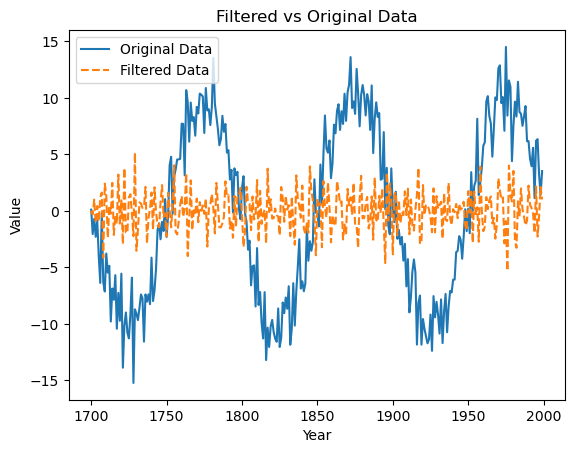

In [29]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.signal

def main(filename):
    # Load data from the specified CSV file
    data = np.loadtxt(filename, delimiter=',', usecols=(1,), unpack=True, skiprows=1)
    # Reverse the order of the data
    data = data[::-1]

    # Design the Butterworth filter
    b, a = scipy.signal.iirdesign(wp=0.2, ws=0.1, gstop=60, gpass=1, ftype='butter')

    # Apply the filter to the data
    filtered = scipy.signal.lfilter(b, a, data)

    # Define the range of years
    year_range = np.arange(1700, 1700 + len(data))

    # Plot the original and filtered data
    plt.plot(year_range, data, label='Original Data')
    plt.plot(year_range, filtered, '--', label='Filtered Data')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Filtered vs Original Data')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python filter_analysis.py <csv_file>")
    else:
        main('data1.csv')


In [31]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(0)
years = np.arange(1700, 1700 + 300)
data = 10 * np.sin(2 * np.pi * years / 100) + np.random.normal(0, 2, size=len(years))

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Value': data
})

# Save to CSV
df.to_csv('data2.csv', index=False)
print('data.csv generated successfully.')


data.csv generated successfully.


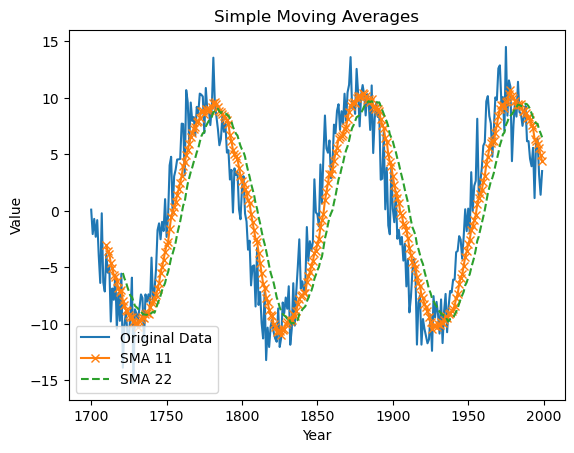

In [33]:
import numpy as np
import sys
import matplotlib.pyplot as plt

def sma(arr, n):
    """
    Compute the Simple Moving Average (SMA) of a given array.
    
    Parameters:
    arr (numpy array): Input data array.
    n (int): Window size for the moving average.

    Returns:
    numpy array: The SMA of the input array.
    """
    weights = np.ones(n) / n
    return np.convolve(arr, weights, mode='valid')

def main(filename):
    # Load data from the specified CSV file
    data = np.loadtxt(filename, delimiter=',', usecols=(1,), unpack=True, skiprows=1)
    # Reverse the order of the data
    data = data[::-1]

    # Define the range of years
    year_range = np.arange(1700, 1700 + len(data))

    # Compute SMAs
    sma11 = sma(data, 11)
    sma22 = sma(data, 22)

    # Plot the original data and SMAs
    plt.plot(year_range, data, label='Original Data')
    plt.plot(year_range[10:], sma11, '-x', label='SMA 11')
    plt.plot(year_range[21:], sma22, '--', label='SMA 22')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Simple Moving Averages')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python sma_analysis.py <csv_file>")
    else:
        main('data2.csv')


In [41]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(0)
years = np.arange(1700, 2020)
data = 10 * np.sin(2 * np.pi * years / 100) + np.random.normal(0, 2, size=len(years))

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Value': data
})

# Save to CSV
df.to_csv('data3.csv', index=False)
print('data.csv generated successfully.')


data.csv generated successfully.


50 50


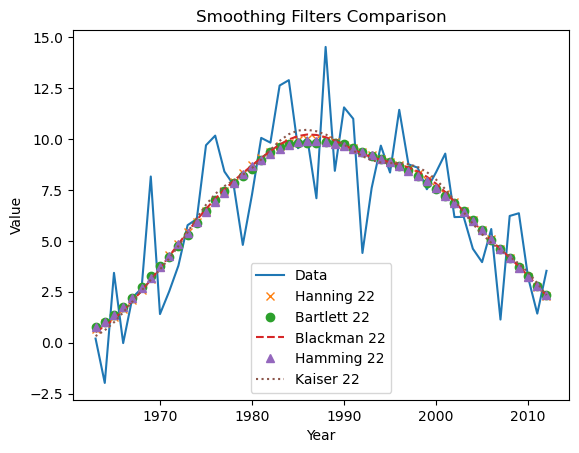

In [43]:
import numpy as np
import sys
import matplotlib.pyplot as plt

def smooth(weights, arr):
    """
    Apply a smoothing filter to the input array using the given weights.
    
    Parameters:
    weights (numpy array): Weights for the smoothing filter.
    arr (numpy array): Input data array to be smoothed.

    Returns:
    numpy array: Smoothed array.
    """
    return np.convolve(arr, weights/weights.sum(), mode='same')

def main(filename):
    # Load data from the specified CSV file
    data = np.loadtxt(filename, delimiter=',', usecols=(1,), unpack=True, skiprows=1)
    # Reverse the order of the data
    data = data[::-1]

    # Select last 50 years
    data = data[-50:]
    year_range = np.arange(1963, 2013)
    print(len(data), len(year_range))

    # Plot original data and smoothed data with various windows
    plt.plot(year_range, data, label="Data")
    plt.plot(year_range, smooth(np.hanning(22), data), 'x', label='Hanning 22')
    plt.plot(year_range, smooth(np.bartlett(22), data), 'o', label='Bartlett 22')
    plt.plot(year_range, smooth(np.blackman(22), data), '--', label='Blackman 22')
    plt.plot(year_range, smooth(np.hamming(22), data), '^', label='Hamming 22')
    plt.plot(year_range, smooth(np.kaiser(22, 14), data), ':', label='Kaiser 22')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Smoothing Filters Comparison')
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python smoothing_analysis.py <csv_file>")
    else:
        main('data3.csv')

In [45]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(0)
years = np.arange(1700, 2020)
data = 10 * np.sin(2 * np.pi * years / 100) + np.random.normal(0, 2, size=len(years))

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Value': data
})

# Save to CSV
df.to_csv('data4.csv', index=False)
print('data.csv generated successfully.')


data.csv generated successfully.


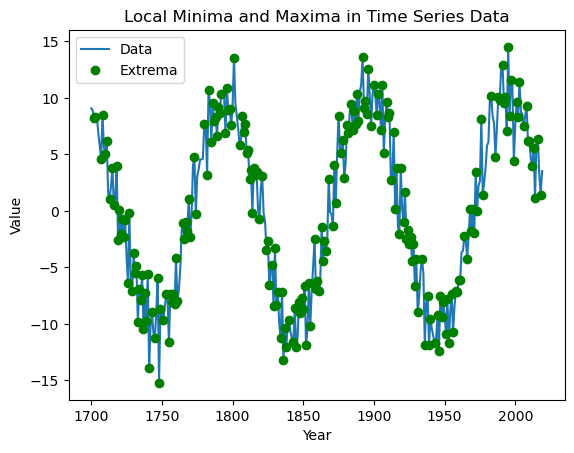

In [47]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import signal

def main(filename):
    # Load data from the specified CSV file
    data = np.loadtxt(filename, delimiter=',', usecols=(1,), unpack=True, skiprows=1)
    # Reverse the order of the data
    data = data[::-1]

    # Identify local minima and maxima
    mins = signal.argrelmin(data)[0]
    maxs = signal.argrelmax(data)[0]

    # Combine minima and maxima indices
    extrema = np.concatenate((mins, maxs))

    # Define the range of years
    year_range = np.arange(1700, 1700 + len(data))

    # Plot the data and mark the extrema points
    plt.plot(year_range, data, label='Data')
    plt.plot(1700 + extrema, data[extrema], 'go', label='Extrema')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Local Minima and Maxima in Time Series Data')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python extrema_analysis.py <csv_file>")
    else:
        main('data4.csv')
